In [2]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Задание 3
#### Пусть x1, ... , xn ∈ Bern(p). Исследуйте зависимость ширины доверительного интервала для параметра распределения p от объема выборки.

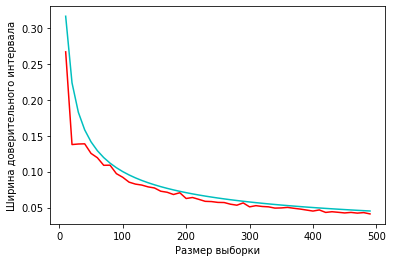

In [3]:
n = range(10, 500, 10) # зададим объемы выборок
q = 0.999 # уровень доверительного интервала
p = 0.3 # параметр распределения Бернулли
x = []
y = []
y_1 = []
for i in n:
    sample = np.random.binomial(1, p, i) # создали выборку, распределенную по Бернули с параметром p объема i
    quantile = np.quantile(sample, (1 + q)/2) #квантиль
    sample_mean = sum(sample) / i # выборочное среднее
    sample_var = sum([(k - sample_mean)**2 for k in sample]) / (i - 1) # исправленная выборочная дисперсия
    width = 2*quantile*sample_var**0.5/np.sqrt(i) # длина доверительного интервала
    # print('[', sample_mean - quantile*sample_var**0.5/np.sqrt(i), ', ', sample_mean + quantile*sample_var**0.5/np.sqrt(i), ']', sep='')
    y.append(width) #ширина интервала
    x.append(i) # объем выборки
    y_1.append(1/np.sqrt(i))
sns.lineplot(x=x, y=y_1, color='c'); # функция y(x) = 1/sqrt(x), чтобы видеть скорость сходимости
sns.lineplot(x=x, y=y, color='r'); # рисуем график зависимости ширины интервала от объема выборки
plt.xlabel('Размер выборки')
plt.ylabel('Ширина доверительного интервала')
plt.show();

На графике видно, что ширина доверительного интервала уменьшается с увеличением объема выборки со скоростью O(1/sqrt(n))

Покажем, что параметр попадает в доверительный интервал с нужной вероятностью, для этого зафиксируем n = 10000 и посмотрим, как часто параметр попадает в доверительный интервал.

Количество итеарций: 100, уровень доверительного интервала: 0.99

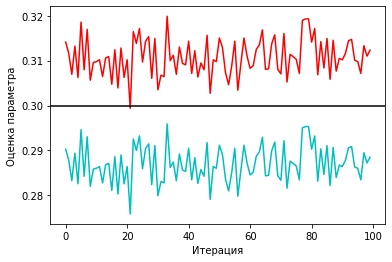

In [35]:
n = 10000
p = 0.3
q = 0.99
x_1 = []
x_2 = []
y = []
count_miss = 0
for i in range(100):
    sample = np.random.binomial(1, p, n) # создали выборку, распределенную по Бернули с параметром p объема n
    quantile = 2.6 #квантиль
    sample_mean = sum(sample) / n # выборочное среднее
    sample_var = sum([(k - sample_mean)**2 for k in sample]) / (n - 1) # исправленная выборочная дисперсия
    x_1.append(sample_mean - quantile*sample_var**0.5 / np.sqrt(n))
    x_2.append(sample_mean + quantile*sample_var**0.5 / np.sqrt(n))
    y.append(i)
    if x_2[i] < p or x_1[i] > p:
        count_miss += 1
sns.lineplot(x=y, y=x_1, color='c'); 
sns.lineplot(x=y, y=x_2, color='r'); 
plt.axhline(y=0.3, color='black', linestyle='-');
plt.xlabel('Итерация')
plt.ylabel('Оценка параметра')
plt.show();

In [36]:
# Количество непопаданий в интервал:
count_miss

1

Количество итераций: 1000, уровень доверительного интервала: 0.99

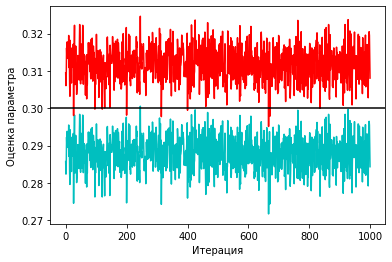

In [39]:
n = 10000
p = 0.3
q = 0.99
x_1 = []
x_2 = []
y = []
count_miss = 0
for i in range(1000):
    sample = np.random.binomial(1, p, n) # создали выборку, распределенную по Бернули с параметром p объема n
    quantile = 2.6 #квантиль
    sample_mean = sum(sample) / n # выборочное среднее
    sample_var = sum([(k - sample_mean)**2 for k in sample]) / (n - 1) # исправленная выборочная дисперсия
    x_1.append(sample_mean - quantile*sample_var**0.5 / np.sqrt(n))
    x_2.append(sample_mean + quantile*sample_var**0.5 / np.sqrt(n))
    y.append(i)
    if x_2[i] < p or x_1[i] > p:
        count_miss += 1
sns.lineplot(x=y, y=x_1, color='c'); 
sns.lineplot(x=y, y=x_2, color='r'); 
plt.axhline(y=0.3, color='black', linestyle='-');
plt.xlabel('Итерация')
plt.ylabel('Оценка параметра')
plt.show();

In [40]:
# Количество непопаданий в интервал:
count_miss

10

Параметр действительно попадает в доверительный интервал с нужной вероятностью.